# Deep Learning
# DL09 Kernels

## <font color='blue'>**Convoluciones**</font>

Cuando tenemos arreglos multidimensionales, distintos canales como en imagenes color. Estas propiedades no se aprovechan cuando se aplica una transformación afín; de hecho, todos los ejes se tratan de la misma forma y no se tiene en cuenta la información topológica. Aún así, aprovechar la estructura implícita de los datos puede resultar muy útil para resolver algunas tareas, como la visión por computadora y el reconocimiento de voz, y en estos casos sería mejor preservarlo. Aquí es donde entran en juego las circunvoluciones discretas.

La __convolución__ es una operación matemática para fusionar dos conjuntos de información. En nuestro caso, la convolución se aplica a los datos de entrada utilizando un filtro de convolución para producir un mapa de características. Se utilizan muchos términos, así que visualicémoslos uno por uno.
Una convolución discreta es una transformación lineal que conserva esta noción de ordenamiento en la información. Es escasa (solo unas pocas unidades de entrada contribuyen a una unidad de salida determinada) y reutiliza los parámetros (se aplican los mismos pesos a varias ubicaciones en la entrada).

El **kernel** , también llamado __filtro__, se desliza por el mapa de características de entrada. En cada ubicación, se calcula el producto entre cada elemento del kernel y el elemento de entrada que superpone y los resultados se suman para obtener la salida en la ubicación actual. La convolución que se muestra en la figura  es un ejemplo de una convolución 2-D, pero puede generalizarse a convoluciones N-D. Por ejemplo, en una convolución 3-D, el **kernel** sería un cuboide y se deslizaría a lo largo de la altura, el ancho y la profundidad del mapa de características de entrada.

![Convolucion](https://drive.google.com/uc?export=view&id=1SVRk5jwmBM_g_JhWgDUEbsc1B5k7oyVM)

Existen 4 propiedades importantes para la configuración de una convolución.

1. El tamaño de entrada (Las dimension de la imagen por ejemplo).
2. El tamaño del kernel.
3. El stride (paso).
4. El padding (borde).

Calculo de kernel con padding.
![Padding](https://drive.google.com/uc?export=view&id=1j_O-TPUYWZpAi7M7XtSj2qN9QbXEXibk)



## <font color='blue'>**Pooling**</font>

Además de las convoluciones discretas en sí mismas, las operaciones de agrupación constituyen otro componente importante en las CNN. Las operaciones de agrupación reducen el tamaño de los mapas de características mediante el uso de alguna función para resumir subregiones, como tomar el valor promedio o máximo.

El pooling funciona deslizando una ventana a través de la entrada y alimentando el contenido de la ventana a una función de agrupación. En cierto sentido, la agrupación funciona de manera muy similar a una convolución discreta, pero reemplaza la combinación lineal descrita por el kernel con alguna otra función. Las figuras siguientes proporcionan un ejemplo de agrupación promedio, y  agrupación máxima respectivamente.

Ejemplo de __averagepooling__
![AveragePooling](https://drive.google.com/uc?export=view&id=1p94IB34ZjPIhm_8o15NhcKJnokV6k8gA)

Ejemplo de __maxpooling__
![MaxPooling](https://drive.google.com/uc?export=view&id=1a-EaOnFuuc_y2PcAprmSfQl9B8sDneKb)



## <font color='blue'>**Convolución transpuesta**</font>

La necesidad de convoluciones transpuestas generalmente surge del deseo de utilizar una transformación que vaya en la dirección opuesta a una convolución normal, es decir, de algo que tiene la forma de la salida de alguna convolución a algo que tiene la forma de su entrada mientras se mantiene una patrón de conectividad que sea compatible con dicha convolución. Por ejemplo, se podría utilizar una transformación como la capa de decodificación de un codificador automático convolucional o para proyectar mapas de características a un espacio de mayor dimensión.


En las convoluciones transpuestas tenemos pesos que se aprenden aprendemos a través del back-propagation.

![Transposed](https://drive.google.com/uc?export=view&id=1OCxHG8ylPy4q68EeaB567IAPxGrRyDSQ)

### Creemos un filtro

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


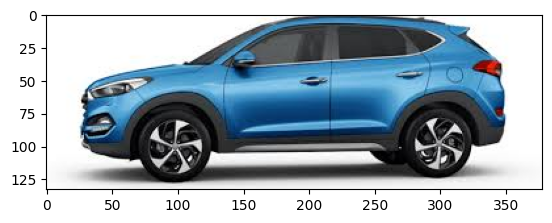

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Leamos la imagen
img_path = "/content/drive/MyDrive/Gonzalo/CD-P2 DEEP LEARNING/CLASE 1/Auto.jfif"
image = mpimg.imread(img_path)
plt.imshow(image)
plt.show()

### Convertir la imagen a escala de gris

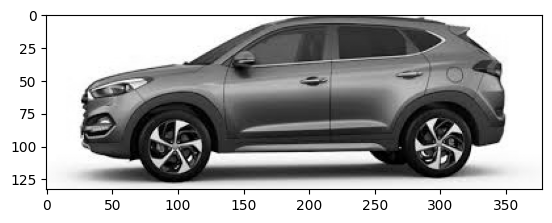

In [3]:
# Convertir la imagen a escala de gris
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')
plt.show()

### Creemos un kernel.

A continuación, se le ha dado un tipo común de filtro de detección de bordes: un __operador Sobel__.

El filtro Sobel se usa muy comúnmente en la detección de bordes y en la búsqueda de patrones de intensidad en una imagen. Aplicar un filtro Sobel a una imagen es una forma de **tomar (una aproximación) de la derivada de la imagen** en la dirección x o y, por separado. Los operadores se ven de la siguiente manera.
<img alt="Sobel"  src="https://drive.google.com/uc?export=view&id=1B1aTXYSDjSjkTMESxNC1sEDYuas0RwRp" width=300px>


Definamos un operador de Sobel.

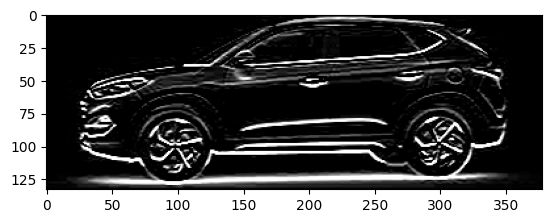

In [4]:
# Definamos el kernel 3x3.
sobel_y = np.array([[ -1, -2, -1],
                    [ 0, 0, 0],
                    [ 1, 2, 1]])

#  Apliquemoslo a la imagen.

# Utilizamos el metodos filter2D para aplicar el operador.
filtered_image = cv2.filter2D(gray, -1, sobel_y)

plt.imshow(filtered_image, cmap='gray')
plt.show()

Más sobre filtros de [OpenCV](https://www.askpython.com/python-modules/opencv-filter2d)

<img src="https://drive.google.com/uc?export=view&id=1Igtn9UXg6NGeRWsqh4hefQUjV0hmzlBv" width="100" align="left" title="Runa-perth">
<br clear="left">

## <font color='red'>**Visualizando imagenes en una red convolucional con Keras.**</font>

Te presentamos un desafío centrado en el poder y la versatilidad de las Redes Neuronales Convolucionales (CNN). Tu tarea es diseñar y implementar un modelo CNN que pueda tomar una imagen real y pasarla a través de una serie de filtros y capas. A medida que construyas tu red, te instamos a visualizar cómo se transforma la imagen en cada etapa, desde la aplicación inicial del filtro hasta las capas más profundas. Considera lo que aprendiste sobre los experimentos de Hubel y Wiesel y cómo las CNN se inspiran en la forma en que los seres vivos procesan la información visual. A medida que avances, reflexiona sobre qué características y patrones busca detectar cada capa. Tu objetivo es no solo construir una CNN funcional sino también obtener una comprensión intuitiva de cómo las transformaciones sucesivas permiten que la red detecte y clasifique patrones visuales.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


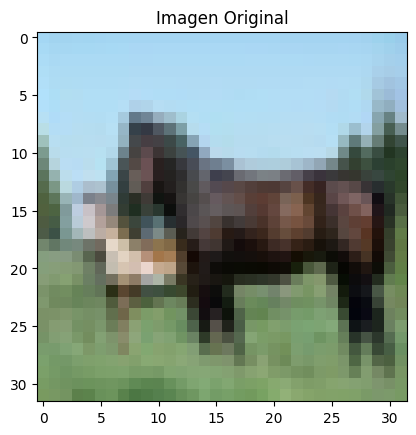

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models

# Cargar el conjunto de datos CIFAR-10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Tomar una imagen de ejemplo
img = train_images[12]  # Selecciona una imagen del conjunto de entrenamiento
plt.imshow(img)
plt.title("Imagen Original")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


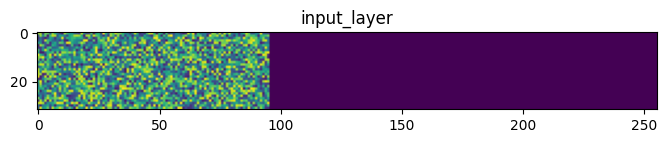

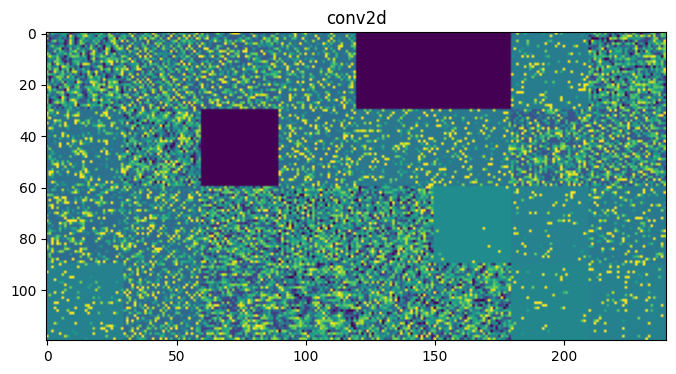

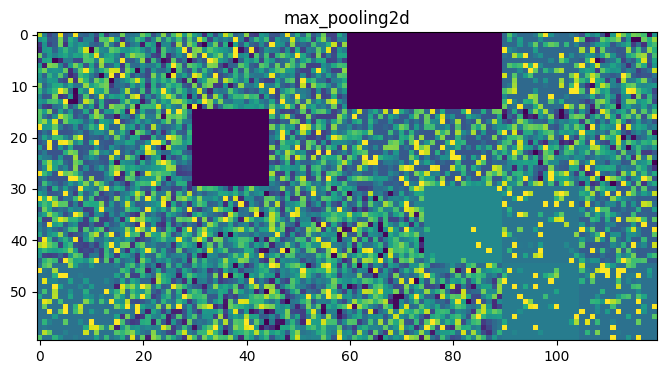

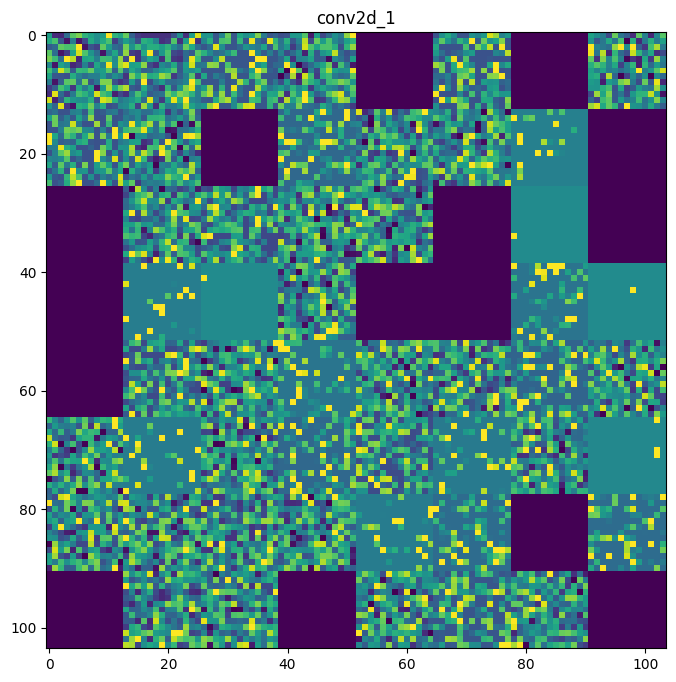

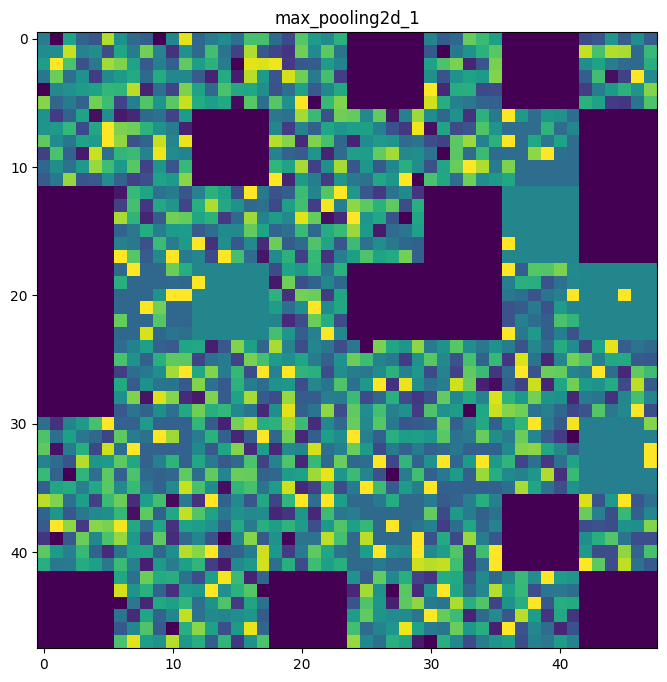

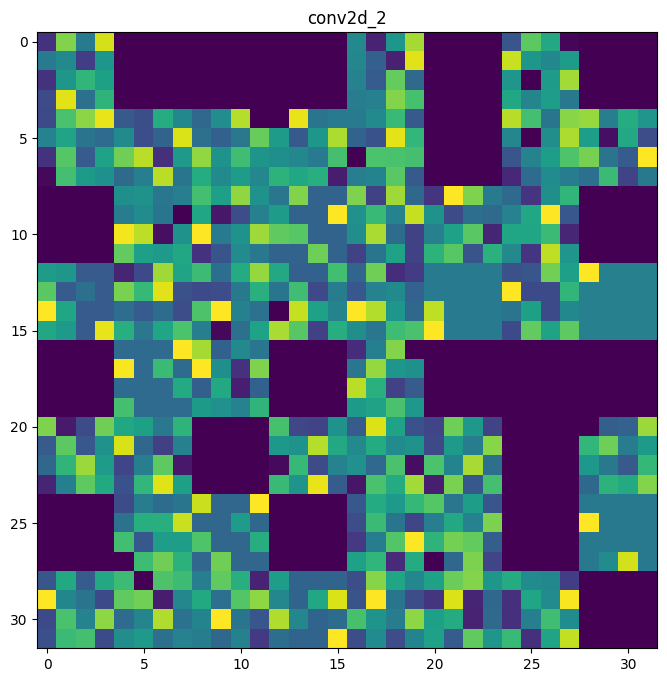

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers, Input

# Crear un modelo con Input explícito
inputs = Input(shape=(32, 32, 3))  # Capa de entrada explícita
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)

# Definir el modelo completo
model = models.Model(inputs=inputs, outputs=x)

# Cargar una imagen de prueba (puedes cambiar esto con tu imagen real)
img = np.random.rand(32, 32, 3)  # Imagen de prueba aleatoria

# Expansión de dimensiones para que sea aceptada por el modelo
img_tensor = np.expand_dims(img, axis=0)

# Definir un nuevo modelo que tenga múltiples salidas
layer_outputs = [layer.output for layer in model.layers]  # Extraer TODAS las capas
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# Obtener las activaciones
activations = activation_model.predict(img_tensor)

# Visualizar las activaciones
layer_names = [layer.name for layer in model.layers]  # Nombres de las capas

images_per_row = 8  # Reducido para mejor visualización

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]  # Número de filtros
    size = layer_activation.shape[1]  # Tamaño de la activación (altura y ancho)

    n_cols = max(1, n_features // images_per_row)  # Asegurar al menos 1 columna
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            index = col * images_per_row + row
            if index >= n_features:  # Prevenir index out of range
                break

            channel_image = layer_activation[0, :, :, index]

            # Normalización segura para evitar NaN
            if np.std(channel_image) != 0:
                channel_image -= np.mean(channel_image)
                channel_image /= np.std(channel_image)
                channel_image *= 64
                channel_image += 128

            channel_image = np.clip(channel_image, 0, 255).astype('uint8')

            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

    # Mostrar la activación de la capa
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()


# <font color='purple' style='bold' size=5>**EXPERIMENTO** </font>

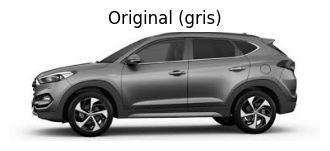

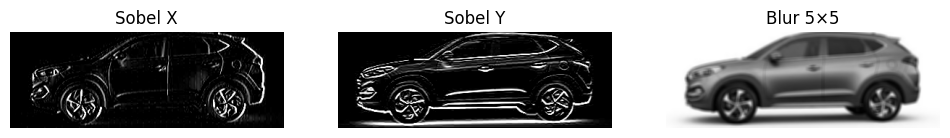

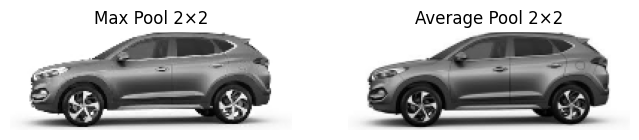

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Carga y muestra la imagen (ajusta la ruta a la tuya)
img = cv2.imread('/content/drive/MyDrive/Gonzalo/CD-P2 DEEP LEARNING/CLASE 1/Auto.jfif', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(4,4))
plt.title("Original (gris)")
plt.imshow(img, cmap='gray')
plt.axis('off')

# 2. Define algunos kernels comunes
kernels = {
    'Sobel X': np.array([[-1, 0, +1],
                         [-2, 0, +2],
                         [-1, 0, +1]]),
    'Sobel Y': np.array([[-1, -2, -1],
                         [ 0,  0,  0],
                         [+1, +2, +1]]),
    'Blur 5×5': np.ones((5,5), dtype=np.float32) / 25
}

# 3. Aplica cada convolución y muestra
plt.figure(figsize=(12,4))
for i, (name, k) in enumerate(kernels.items(), 1):
    filtered = cv2.filter2D(img, -1, k)
    plt.subplot(1, 3, i)
    plt.title(name)
    plt.imshow(filtered, cmap='gray')
    plt.axis('off')

# 4. Funciones de pooling manual (stride = tamaño)
def max_pool(image, pool_size):
    h, w = image.shape
    h2, w2 = h // pool_size, w // pool_size
    # The original reshape was attempting to create a 4D array from a 2D image
    # For max pooling on a grayscale image, we should keep it 2D
    # Reshape to create windows of size pool_size x pool_size
    reshaped_image = image[:h2 * pool_size, :w2 * pool_size].reshape(h2, pool_size, w2, pool_size)
    # Take the maximum value within each window
    pooled_image = reshaped_image.max(axis=(1, 3))
    return pooled_image


def avg_pool(image, pool_size):
    h, w = image.shape
    h2, w2 = h // pool_size, w // pool_size
    # Similar to max_pool, keep the image 2D
    reshaped_image = image[:h2 * pool_size, :w2 * pool_size].reshape(h2, pool_size, w2, pool_size)
    # Calculate the average value within each window
    pooled_image = reshaped_image.mean(axis=(1, 3)).astype(np.uint8)
    return pooled_image
# 5. Aplica pooling con ventana 2×2
mp = max_pool(img, 2)
ap = avg_pool(img, 2)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Max Pool 2×2")
plt.imshow(mp, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Average Pool 2×2")
plt.imshow(ap, cmap='gray')
plt.axis('off')

plt.show()


**Lee la imagen en escala de grises y la muestra.**

**Define tres kernels:** Sobel horizontal, Sobel vertical y un blur 5×5.

**Aplica cada kernel con cv2.filter2D y se visualiza el resultado.**

Implementa max pooling y average pooling de forma manual usando reshape y operaciones NumPy.

se muestran los mapas reducidos por pooling 2×2

# <font color='purple' style='bold' size=5>**FIN EXPERIMENTO** </font>


# <font color='purple' style='bold' size=5>**MATERIAL ADICIONAL** </font>

El término kernel proviene de procesamiento de señales en los años 50–60 (Gonzalez & Woods, 2008)[3]. Inicialmente se usaba en filtrado de audio.

David Hubel y Torsten Wiesel (1962) demostraron en corteces visuales de gatos la existencia de neuronas que responden a bordes de orientación específicos, inspirando las CNN modernas [4].

La capa de pooling se introdujo en LeNet-1 (1990) para reducir sensibilidad a desplazamientos leves [5].

In [10]:
import numpy as np
from scipy.signal import convolve2d

# Definir kernel 3x3
kernel = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
# Dilatation rate = 2 -> inserta cero entre elementos
d_rate = 2
# Construir kernel dilatado (5×5)
dilated = np.zeros((kernel.shape[0] + (kernel.shape[0]-1)*(d_rate-1),
                     kernel.shape[1] + (kernel.shape[1]-1)*(d_rate-1)), dtype=kernel.dtype)
for i in range(kernel.shape[0]):
    for j in range(kernel.shape[1]):
        dilated[i*d_rate, j*d_rate] = kernel[i, j]

# Aplicar a una imagen de ejemplo
dummy = np.random.rand(100, 100)
output = convolve2d(dummy, dilated, mode='same', boundary='fill', fillvalue=0)
print('Salida convolución dilatada:', output.shape)

Salida convolución dilatada: (100, 100)


**Referencias**

Chen, L.-C., Papandreou, G., Kokkinos, I., Murphy, K., & Yuille, A. L. (2018). DeepLab: Semantic Image Segmentation with Deep Convolutional Nets, Atrous Convolution, and Fully Connected CRFs. IEEE Transactions on Pattern Analysis and Machine Intelligence.

Howard, A. G., et al. (2017). MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications. arXiv:1704.04861.

Gonzalez, R. C., & Woods, R. E. (2008). Digital Image Processing (3rd ed.). Prentice Hall.

Hubel, D. H., & Wiesel, T. N. (1962). Receptive fields, binocular interaction and functional architecture in the cat’s visual cortex. The Journal of Physiology.

LeCun, Y., et al. (1998). Gradient-Based Learning Applied to Document Recognition. Proceedings of the IEEE.

# <font color='purple' style='bold' size=5>**FIN MATERIAL ADICIONAL** </font>